In [1]:
import pandas as pd
import os
from pathlib import Path


cwd = os.getcwd() # current working directory


wd = Path(cwd).parents[1] # project working directory (2 levels up: exp1_human_human -> Scripts -> project root)

# Directory containing the CSV files
directory =  os.path.join(wd, 'OtherResults', 'AA_scores_traces')

# Path to trial TA conditions file
ta_conditions_path = os.path.join(Path(cwd).parent, 'trialTAConditions.csv')

# Check if directory exists
if not os.path.exists(directory):
    raise FileNotFoundError(f"Directory not found: {directory}\nMake sure you've run binary_trace_evaluator_Exp1.py first.")

# Check if TA conditions file exists
if not os.path.exists(ta_conditions_path):
    raise FileNotFoundError(f"TA conditions file not found: {ta_conditions_path}")

# Process each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and not filename.startswith('averaged_') and not filename.startswith('combined_'):
        filepath = os.path.join(directory, filename)
        
        # Load the data files
        scores_df = pd.read_csv(filepath)
        ta_conditions_df = pd.read_csv(ta_conditions_path) # TA conditions for each trial

        # Melt scores_df to long format to associate scores with trials
        scores_melted = pd.melt(scores_df, id_vars=['Session', 'Player'], value_vars=[str(i) for i in range(7, 25)],
                                var_name='Trial', value_name='Score')

        # Convert 'Trial' column to numeric to merge with TA conditions
        scores_melted['Trial'] = pd.to_numeric(scores_melted['Trial'])

        # Merge melted scores data with TA conditions
        merged_df = pd.merge(scores_melted, ta_conditions_df, on='Trial')

        # Calculate the average score for each Session, Player, and TACondition
        averages_df = merged_df.groupby(['Session', 'Player', 'TACondition'])['Score'].mean().reset_index()

        # Pivot the table to have TACondition 3, 4, and 5 as separate columns
        averages_pivot = averages_df.pivot(index=['Session', 'Player'], columns='TACondition', values='Score').reset_index()

        # Rename columns for clarity
        averages_pivot.columns = ['Session', 'Player', 'TACondition_3', 'TACondition_4', 'TACondition_5']

        # Save the new DataFrame to a CSV file
        output_filename = os.path.join(directory, f'averaged_scores_{filename}')
        averages_pivot.to_csv(output_filename, index=False)

        print(f"Averaged scores saved to '{output_filename}'")

Averaged scores saved to '/Users/mikerichardson/Projects_Python/From-Human-Heuristics-to-Human-AI-Teams/OtherResults/AA_scores_traces/averaged_scores_AA_scores_traces_SuccessiveCollinearAngle.csv'
Averaged scores saved to '/Users/mikerichardson/Projects_Python/From-Human-Heuristics-to-Human-AI-Teams/OtherResults/AA_scores_traces/averaged_scores_AA_scores_traces_SuccessiveContainmentZone.csv'
Averaged scores saved to '/Users/mikerichardson/Projects_Python/From-Human-Heuristics-to-Human-AI-Teams/OtherResults/AA_scores_traces/averaged_scores_AA_scores_traces_SuccessiveAngle.csv'
Averaged scores saved to '/Users/mikerichardson/Projects_Python/From-Human-Heuristics-to-Human-AI-Teams/OtherResults/AA_scores_traces/averaged_scores_AA_scores_traces_SuccessiveCollinearDistance.csv'
Averaged scores saved to '/Users/mikerichardson/Projects_Python/From-Human-Heuristics-to-Human-AI-Teams/OtherResults/AA_scores_traces/averaged_scores_AA_scores_traces_SuccessiveDistance.csv'


/var/folders/_n/5wxln6_12gb153kv9xc_63mm0000gp/T/ipykernel_25152/704166777.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_3']['Average Score'],
/var/folders/_n/5wxln6_12gb153kv9xc_63mm0000gp/T/ipykernel_25152/704166777.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_3']['Average Score'],
/var/folders/_n/5wxln6_12gb153kv9xc_63mm0000gp/T/ipykernel_25152/704166777.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([session_avg_melted[sess

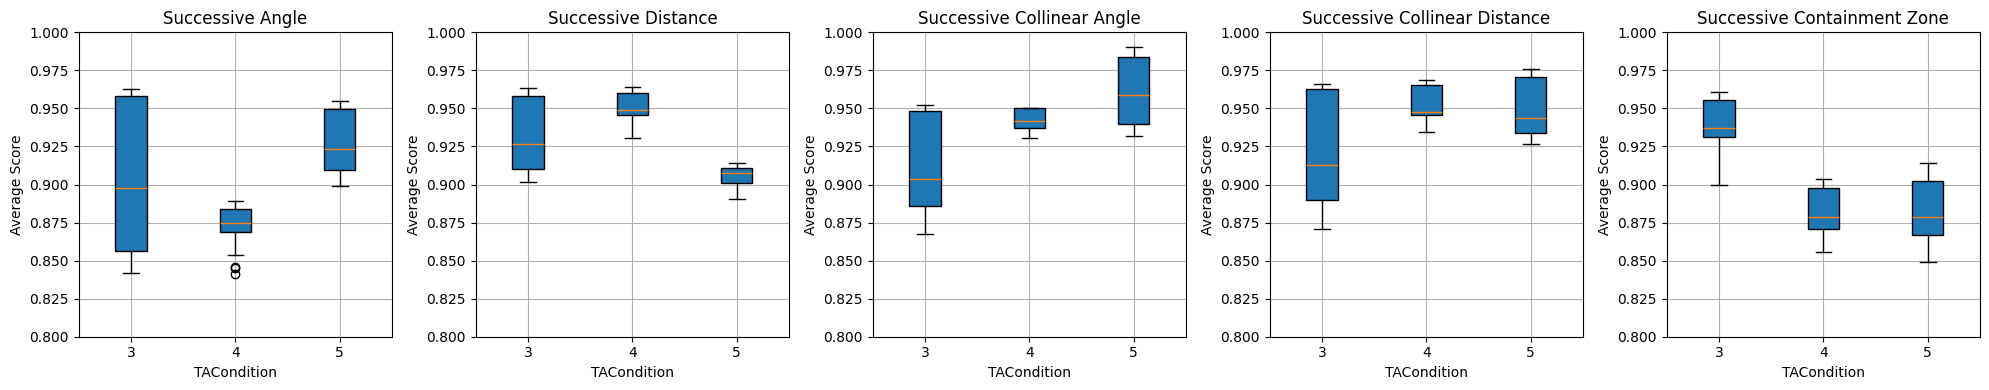

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Filenames and corresponding legend names
file_list = [
    'averaged_scores_AA_scores_traces_SuccessiveAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveContainmentZone.csv'
    ]

file_names = [
    'Successive Angle',
    'Successive Distance',
    'Successive Collinear Angle',
    'Successive Collinear Distance',
    'Successive Containment Zone'
]

# Load each specified averaged CSV file and create a subplot for each
fig, axes = plt.subplots(1, len(file_list), figsize=(4 * len(file_list), 4))

if len(file_list) == 1:
    axes = [axes]

for idx, (filename, ax) in enumerate(zip(file_list, axes)):
    filepath = os.path.join(directory, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)

        # Check if the necessary columns exist
        if all(col in df.columns for col in ['Session', 'Player', 'TACondition_3', 'TACondition_4', 'TACondition_5']):
            # Melt the dataframe to long format for easier plotting
            session_avg_melted = pd.melt(df, id_vars=['Session', 'Player'], value_vars=['TACondition_3', 'TACondition_4', 'TACondition_5'],
                                         var_name='TACondition', value_name='Average Score')

            # Plot the data using boxplots for each TACondition
            ax.boxplot([session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_3']['Average Score'],
                        session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_4']['Average Score'],
                        session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_5']['Average Score']],
                       labels=['3', '4', '5'], patch_artist=True)

            ax.set_ylim(.8, 1.0)
            ax.set_title(file_names[idx])
            ax.set_xlabel('TACondition')
            ax.set_ylabel('Average Score')
            ax.grid(True)
        else:
            print(f"Missing data in '{filename}'")
            ax.set_title(f"{file_names[idx]} (Missing Data)")
            ax.axis('off')

plt.tight_layout()
plt.show()

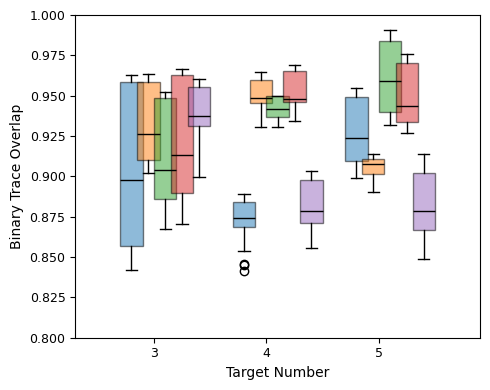

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing the averaged CSV files

# Filenames and corresponding legend names
file_list = [
    'averaged_scores_AA_scores_traces_SuccessiveAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveContainmentZone.csv'
    ]

file_names = [
    'Successive Angle',
    'Successive Distance',
    'Successive Collinear Angle',
    'Successive Collinear Distance',
    'Successive Containment Zone'
]

# Initialize a plot
plt.figure(figsize=(5, 4))

# Load each specified averaged CSV file and add its data to the plot
all_boxes = []
for idx, filename in enumerate(file_list):
    filepath = os.path.join(directory, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)

        # Check if the necessary columns exist
        if all(col in df.columns for col in ['Session', 'Player', 'TACondition_3', 'TACondition_4', 'TACondition_5']):
            # Melt the dataframe to long format for easier plotting
            session_avg_melted = pd.melt(df, id_vars=['Session', 'Player'], value_vars=['TACondition_3', 'TACondition_4', 'TACondition_5'],
                                         var_name='TACondition', value_name='Average Score')

            # Collect the data for boxplots for each TACondition
            data_3 = session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_3']['Average Score']
            data_4 = session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_4']['Average Score']
            data_5 = session_avg_melted[session_avg_melted['TACondition'] == 'TACondition_5']['Average Score']

            # Add boxplot data to the list for each TACondition
            all_boxes.append((data_3, f'C{idx}', file_names[idx]))
            all_boxes.append((data_4, f'C{idx}', None))
            all_boxes.append((data_5, f'C{idx}', None))

# Create the boxplots for each TACondition, using different colors for each file
positions = [3, 4, 5]
for i, (data, color, label) in enumerate(all_boxes):
    pos = positions[i % 3] + (i // 3) * 0.15 - 0.2  # Adjust position to avoid overlap
    plt.boxplot(data, positions=[pos], widths=0.2, patch_artist=True,
                boxprops=dict(facecolor=color, alpha=0.5), medianprops=dict(color='black'))
    if label:
        plt.plot([], c=color, label=label)

# Set labels and title
#set font to times new roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Target Number', fontsize=10)
plt.ylabel('Binary Trace Overlap', fontsize=10)
#plt.title('Binary Trace Overlap')
plt.xticks([3, 4, 5], ['3', '4', '5'],fontsize=9)
plt.yticks(fontsize=9)
#plt.legend(loc='upper left', fontsize=9, frameon=False)
plt.ylim(0.8, 1.0)
plt.tight_layout()

# Save the plot to a file
#plt.savefig('exp1Data/BinaryTraceOverlap_exp1.png')

# Display the plot
plt.show()

In [4]:
import pandas as pd
import numpy as np
import os

# Filenames and corresponding legend names
file_list = [
    'averaged_scores_AA_scores_traces_SuccessiveAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearAngle.csv',
    'averaged_scores_AA_scores_traces_SuccessiveCollinearDistance.csv',
    'averaged_scores_AA_scores_traces_SuccessiveContainmentZone.csv'
    ]

file_names = [
    'Successive Angle',
    'Successive Distance',
    'Successive Collinear Angle',
    'Successive Collinear Distance',
    'Successive Containment Zone'
]

# Combine data from all files for analysis
combined_data = []
for idx, filename in enumerate(file_list):
    filepath = os.path.join(directory, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)

        # Check if the necessary columns exist
        if all(col in df.columns for col in ['Session', 'Player', 'TACondition_3', 'TACondition_4', 'TACondition_5']):
            # Melt the dataframe to long format for statistical analysis
            df_melted = pd.melt(df, id_vars=['Session', 'Player'], value_vars=['TACondition_3', 'TACondition_4', 'TACondition_5'],
                                var_name='TACondition', value_name='Average_Score')
            df_melted['TACondition'] = df_melted['TACondition'].str.extract('(\d+)').astype(int)
            df_melted['Policy'] = file_names[idx]

            # Ensure there are no missing values
            df_melted = df_melted.dropna()
            combined_data.append(df_melted)

# Concatenate all data into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Save the combined data to a CSV file for R analysis
combined_df.to_csv(os.path.join(directory, 'combined_binarytraceoverlap_data_for_R.csv'), index=False)

print("Data saved for import into R.")

Data saved for import into R.
